# Star Wars Correlation Matrix Demonstration
##### May the Fourth be with you

### Import and view head of Star Wars Planet Data

#### *When implementing this code block on your own:*
##### Be certain that the correct dataset name is used in the read.dataframe section.
##### The name you use may be different than the one used in this code example.

In [1]:
import domojupyter as domo
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Use the correct dataset name from the example dataset you uploaded into Domo.
input = domo.read_dataframe('Star Wars | Planets | Correlation Matrix', query='SELECT * FROM table')
input.info()
input.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             60 non-null     object
 1   rotation_period  48 non-null     Int64 
 2   orbital_period   48 non-null     Int64 
 3   diameter         44 non-null     Int64 
 4   climate          47 non-null     object
 5   gravity          44 non-null     object
 6   terrain          54 non-null     object
 7   surface_water    26 non-null     object
 8   population       43 non-null     Int64 
dtypes: Int64(4), object(5)
memory usage: 4.7+ KB


,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population
0,Alderaan,24,364,12500,temperate,1 standard,"grasslands, mountains",40,2000000000
1,Yavin IV,24,4818,10200,temperate,1 standard,"jungle, rainforests",8,1000
2,Hoth,23,549,7200,frigid,1.1 standard,"tundra, ice caves, mountain ranges",100,<NA>
3,Dagobah,23,341,8900,tropical,NaN,"swamp, jungles",8,<NA>
4,Bespin,12,5110,118000,temperate,"1.5 (surface), 1 standard (Cloud City)",gas giant,0,6000000


### Data Preparation & One-Hot Encoding

In [2]:
### Change surface_water to float so it can be included in correlation matrix
input['surface_water'] = input.surface_water.astype(float)

### Parse string for gravity and convert to float to be used in correlation matrix
input['gravity'] = input.gravity.str.split(expand=True).loc[:,0].astype(float)

In [3]:
### One-Hot encode climate so as to include in correlation matrix
climate = pd.get_dummies(input.climate, prefix='climate')

### Join One-Hot encoded climate to input and drop categoricals climate and terrain
input_df = pd.concat([input.drop(columns=['climate','terrain'],axis=1),climate], axis=1)

input_df.head()

,name,rotation_period,orbital_period,diameter,gravity,surface_water,population,climate_arid,climate_frigid,climate_hot,climate_temperate,climate_tropical
0,Alderaan,24,364,12500,1.0,40.0,2000000000,0,0,0,1,0
1,Yavin IV,24,4818,10200,1.0,8.0,1000,0,0,0,1,0
2,Hoth,23,549,7200,1.1,100.0,<NA>,0,1,0,0,0
3,Dagobah,23,341,8900,NaN,8.0,<NA>,0,0,0,0,1
4,Bespin,12,5110,118000,1.5,0.0,6000000,0,0,0,1,0


### Create row for Earth and add to planets dataframe

In [4]:
earth_dict = {'name':'Earth',
              'rotation_period': 24,
              'orbital_period': 365,
              'diameter': 12742,
              'gravity': 1,
              'surface_water': 71,
              'population': 7942645086,
              'climate_arid': 1,
              'climate_frigid': 1,
              'climate_hot': 1,
              'climate_temperate': 1,
              'climate_tropical': 1
             }

earth_df = pd.DataFrame(earth_dict, index=[0])

display(earth_df)

planets_df = pd.concat([earth_df,input_df], ignore_index = True)
display(planets_df)

,name,rotation_period,orbital_period,diameter,gravity,surface_water,population,climate_arid,climate_frigid,climate_hot,climate_temperate,climate_tropical
0,Earth,24,365,12742,1,71,7942645086,1,1,1,1,1


,name,rotation_period,orbital_period,diameter,gravity,surface_water,population,climate_arid,climate_frigid,climate_hot,climate_temperate,climate_tropical
0,Earth,24,365,12742,1.0,71.0,7942645086,1,1,1,1,1
1,Alderaan,24,364,12500,1.0,40.0,2000000000,0,0,0,1,0
2,Yavin IV,24,4818,10200,1.0,8.0,1000,0,0,0,1,0
3,Hoth,23,549,7200,1.1,100.0,<NA>,0,1,0,0,0
4,Dagobah,23,341,8900,NaN,8.0,<NA>,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
57,Shili,<NA>,<NA>,<NA>,1.0,NaN,<NA>,0,0,0,1,0
58,Kalee,23,378,13850,1.0,NaN,4000000000,1,0,0,0,0
59,Umbara,<NA>,<NA>,<NA>,NaN,NaN,<NA>,0,0,0,0,0
60,Tatooine,23,304,10465,1.0,1.0,200000,1,0,0,0,0


In [5]:
#solar_system_dict = {'name':['Earth', 'Mercury', 'Venus', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune'],
#              'rotation_period': [24, 1408, 5832, 25, 10, 11, 17, 16],
#              'orbital_period': [365, 88, 225, 687, 4333, 10759, 30687, 60190],
#              'diameter': [12742, 4880, 12104, 6780, 39822, 116464, 50724, 49244],
#              'climate': ['varied', None, None, None, None, None, None, None],
#              'gravity': ['1 standard', '0.378 standard', '0.907 standard', '0.377 standard', '2.36 standard', '0.916 standard', '0.889 standard', '1.12 standard'],
#              'terrain': ['varied', None, None, None, None, None, None, None],
#              'surface_water': [71, 0, 0, 0, 0, 0, 0, 0],
#              'population': [7942645086, 0, 0, 0, 0, 0, 0, 0]
#             }

#earth_df = pd.DataFrame.from_dict(earth_dict)

#display(earth_df)

#planets_df = pd.concat([earth_df,input], ignore_index = True)
#display(planets_df)

### Create and Display Correlation Matrix

/tmp/ipykernel_4650/215085107.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(input_df.corr(method='pearson')))
/tmp/ipykernel_4650/215085107.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(input_df.corr(method='pearson'), mask=mask, fmt='.2f',vmin=-1, vmax=1, annot=True,cmap='PiYG')


<Figure size 2000x1000 with 0 Axes>

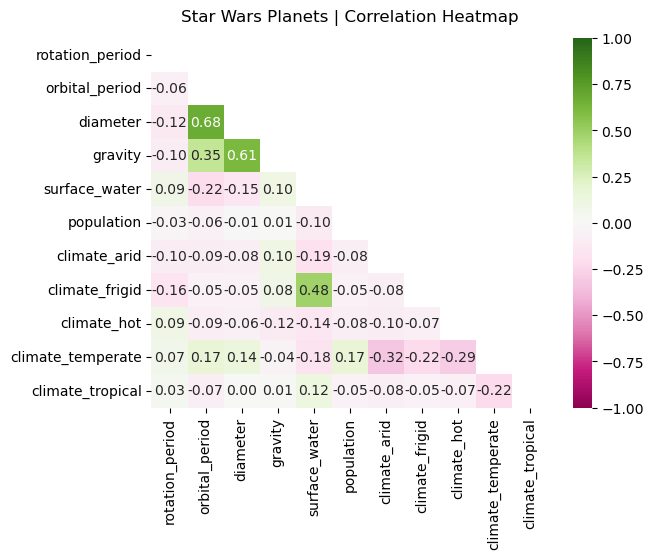

<Figure size 2000x1000 with 0 Axes>

In [15]:
mask = np.triu(np.ones_like(input_df.corr(method='pearson')))


heatmap = sns.heatmap(input_df.corr(method='pearson'), mask=mask, fmt='.2f',vmin=-1, vmax=1, annot=True,cmap='PiYG')
heatmap.set_title('Star Wars Planets | Correlation Heatmap', pad=12)
plt.figure(figsize=(20,10))

### Format Correlation Matrix for use in Domo Card

In [21]:
df = input_df.corr(method='pearson')
df['Var1'] = df.index
df = df.melt(id_vars='Var1', var_name="Var2", value_name='Correlation')
df

/tmp/ipykernel_4650/2089118059.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = input_df.corr(method='pearson')


,Var1,Var2,Correlation
0,rotation_period,rotation_period,1.000000
1,orbital_period,rotation_period,-0.062825
2,diameter,rotation_period,-0.119246
3,gravity,rotation_period,-0.101418
4,surface_water,rotation_period,0.085896
...,...,...,...
116,climate_arid,climate_tropical,-0.075117
117,climate_frigid,climate_tropical,-0.051724
118,climate_hot,climate_tropical,-0.067958
119,climate_temperate,climate_tropical,-0.223731


### Output to a Domo Dataset

#### *When implementing this code block on your own:*
##### Be certain that the correct dataset name is used in the read.dataframe section.
##### The name you use may be different than the one used in this code example.

In [17]:
### Use the correct dataset name from the example dataset you uploaded into Domo.

domo.write_dataframe(df, 'Star Wars Planets | Jupyter | Correlation Matrix')